In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

df_raw = pd.read_csv("/content/clsz2.csv")
df_raw

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [3]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
df_raw.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [5]:
# Number of occurences for each size (target variable)
df_raw["size"].value_counts()

,count
size,
M,29712
S,21924
XXXL,21359
XL,19119
L,17587
XXS,9964
XXL,69


<Axes: xlabel='size', ylabel='count'>

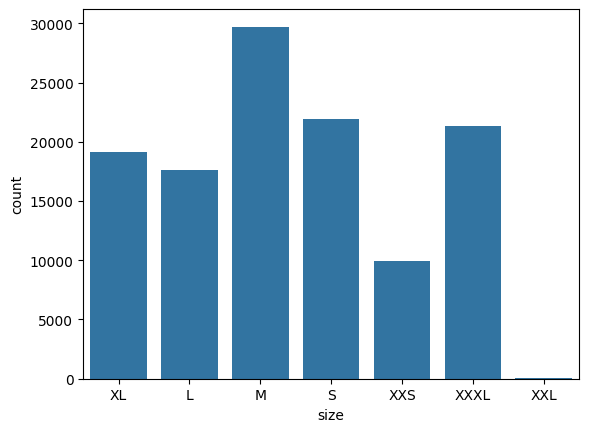

In [6]:
# Number of occurences for each size (target variable)
sns.countplot(x=df_raw["size"])

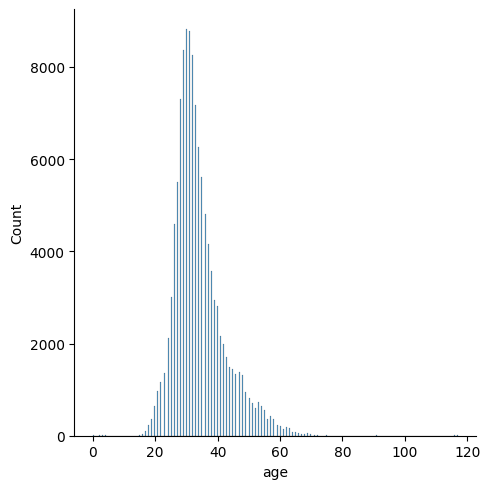

In [7]:
# Age distribution
sns.displot(df_raw["age"])

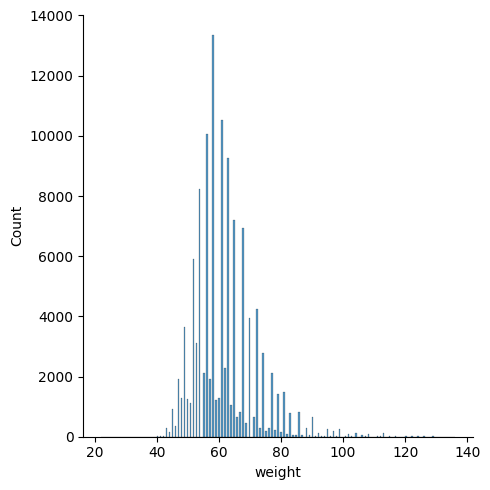

In [8]:
# Weight distribution
sns.displot(df_raw["weight"])

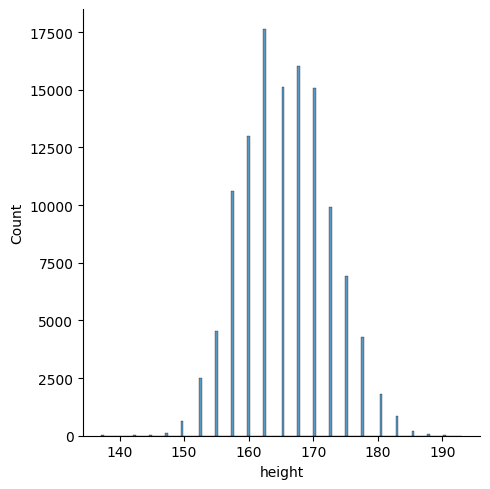

In [9]:
# height distribution
sns.displot(df_raw["height"])

In [10]:
# Removing Outliers
dfs = []
sizes = []
for size_type in df_raw['size'].unique():
    sizes.append(size_type)
    ndf = df_raw[['age','height','weight']][df_raw['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore)

for i in range(len(dfs)):
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]

for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]
df_raw = pd.concat(dfs)
df_raw.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [11]:
# Check for missing values
df_raw.isna().sum()

,0
age,1678
height,547
weight,1069
size,0


In [12]:
# Filling missing data
df_raw["age"] = df_raw["age"].fillna(df_raw['age'].median())
df_raw["height"] = df_raw["height"].fillna(df_raw['height'].median())
df_raw["weight"] = df_raw["weight"].fillna(df_raw['weight'].median())


In [13]:
# Mapping clothes size from strings to numeric
df_raw['size'] = df_raw['size'].map({"XXS": 1,
                                     "S": 2,
                                     "M" : 3,
                                     "L" : 4,
                                     "XL" : 5,
                                     "XXL" : 6,
                                     "XXXL" : 7})

In [14]:
# Check for missing values
df_raw.isna().sum()

,0
age,0
height,0
weight,0
size,0


In [15]:
df_raw

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,5
24,-0.713290,1.539527,1.556338,5
25,-0.353183,-1.161765,-0.291241,5
28,-0.473219,-1.933562,-1.399788,5
34,0.126960,-0.775866,0.447791,5
...,...,...,...,...
112707,-1.236027,-1.489537,0.318135,6
114732,-0.633300,-0.052082,1.494100,6
114803,-0.432391,-0.052082,0.514129,6
114994,0.973972,-0.052082,-0.465841,6


In [16]:
# feature eng
df_raw["bmi"] = df_raw["height"]/df_raw["weight"]
df_raw["weight-squared"] = df_raw["weight"] * df_raw["weight"]

In [17]:

df_raw

,age,height,weight,size,bmi,weight-squared
0,-0.833326,0.767729,-0.660757,5,-1.161894,0.436599
24,-0.713290,1.539527,1.556338,5,0.989198,2.422189
25,-0.353183,-1.161765,-0.291241,5,3.989017,0.084821
28,-0.473219,-1.933562,-1.399788,5,1.381325,1.959407
34,0.126960,-0.775866,0.447791,5,-1.732653,0.200517
...,...,...,...,...,...,...
112707,-1.236027,-1.489537,0.318135,6,-4.682086,0.101210
114732,-0.633300,-0.052082,1.494100,6,-0.034858,2.232334
114803,-0.432391,-0.052082,0.514129,6,-0.101301,0.264329
114994,0.973972,-0.052082,-0.465841,6,0.111801,0.217008


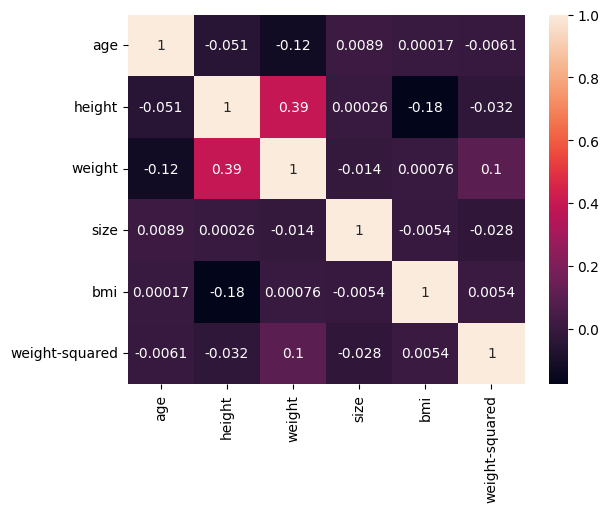

In [18]:
corr = sns.heatmap(df_raw.corr(), annot=True)

In [19]:
# splitting train test
# Features
X = df_raw.drop("size", axis=1)

# Target
y = df_raw["size"]

In [20]:
X.head()

,age,height,weight,bmi,weight-squared
0,-0.833326,0.767729,-0.660757,-1.161894,0.436599
24,-0.713290,1.539527,1.556338,0.989198,2.422189
25,-0.353183,-1.161765,-0.291241,3.989017,0.084821
28,-0.473219,-1.933562,-1.399788,1.381325,1.959407
34,0.126960,-0.775866,0.447791,-1.732653,0.200517


In [21]:
y.head()

,size
0,5
24,5
25,5
28,5
34,5


In [22]:
# Splitting data into training set and validation set

X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.10)

In [23]:
len(X_train), len(X_test)

(107760, 11974)

In [24]:
# Put models in a dictionary
models = {
         "KNN": KNeighborsClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no labels)
   y_train: training labels
   y_test: test labels
   """
    # Set random seed
    np.random.seed(18)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores


In [25]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores



{'KNN': 0.9032904626691164}

In [26]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))


[[1034    0    0    0    0    0    0]
 [   0 2174    0    0    0    0    1]
 [   0    0 2957    0    0    0    0]
 [   0    0    0 1729    0    0    0]
 [   0    0    0    0 1957    0    0]
 [   0    0    0    0    0    9    2]
 [   0    1    2    0    0    0 2108]]


In [28]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1034
           2       1.00      1.00      1.00      2175
           3       1.00      1.00      1.00      2957
           4       1.00      1.00      1.00      1729
           5       1.00      1.00      1.00      1957
           6       1.00      0.82      0.90        11
           7       1.00      1.00      1.00      2111

    accuracy                           1.00     11974
   macro avg       1.00      0.97      0.99     11974
weighted avg       1.00      1.00      1.00     11974



In [29]:
from sklearn.preprocessing import StandardScaler
import joblib

# Scaling the input data
scaler = StandardScaler()

# Fit the scaler on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Update model training to use scaled data
models = {"KNN": KNeighborsClassifier()}

# Train the model and score using the fit_and_score function
model_scores = fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test)


# Save the trained model (KNN in this case)
model = models["KNN"]
joblib.dump(model, "knn_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Load the saved model and scaler
loaded_model = joblib.load("knn_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Prediction for given input
new_data = np.array([[36, 59, 167.64, 201,59*59]])
new_data_scaled = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)

print(f"Predicted size for input [age=28, weight=62, height=172.72, bmi=20.8]: {prediction[0]}")


Predicted size for input [age=28, weight=62, height=172.72, bmi=20.8]: 4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:

# Load the saved model and scaler
loaded_model = joblib.load("knn_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Prediction for given input
new_data = np.array([[36, 59, 167.64,208,59*59]])
new_data_scaled = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)

print(f"Predicted size for input [age=28, weight=62, height=172.72, bmi=20.8]: {prediction[0]}")


Predicted size for input [age=28, weight=62, height=172.72, bmi=20.8]: 4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
